# Το Νήμα της Ζωής

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Η Παγκόσμια Τράπεζα (World Bank) παρέχει κυριολεκτικά έναν θησαυρό δεδομένων στο https://data.worldbank.org/.

* Χρησιμοποιώντας ένα μικρό μέρος μόνο των δεδομένων, θα διερευνήσουμε τη σχέση μεταξύ του κατά κεφαλήν ΑΕΠ και του προσδόκιμου ζωής σε διαφορετικές χώρες.

* Τα δεδομένα για το κατά κεφαλήν ΑΕΠ είναι διαθέσιμα στο http://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD.

* Το ΑΕΠ έχει αναχθεί σε ισοδύναμη αγοραστική δύναμη (Purchasing Power Parity, PPP).

In [35]:
import pandas as pd
pd.set_option('display.max_colwidth', 25)
gdp_df = pd.read_csv('worldbank/gdp_per_capita_ppp/API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_3469401.csv', 
                     skiprows=4)

In [36]:
gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,33567.550017,36829.032774,36779.429429,37311.750320,37585.025079,38897.122666,NaN,NaN,NaN,NaN
1,Africa Eastern and So...,AFE,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3235.163359,3362.868809,3499.132878,3527.164192,3620.921502,3697.459305,3786.357310,3836.571430,3677.111255,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.635648,2152.366489,2077.874554,NaN
3,Africa Western and Ce...,AFW,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.815774,4335.199547,4240.534782,NaN
4,Angola,AGO,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7412.967035,7682.475386,8179.297828,7337.569822,7103.226431,7310.896589,7099.971958,6952.419362,6443.032680,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8039.207976,8383.397311,8649.449499,9357.135136,10007.689234,10436.168846,11013.397081,11797.119317,11383.404733,NaN
262,"Yemen, Rep.",YEM,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3491.204610,3688.519409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,13215.708679,13606.942896,13602.102643,13701.945390,13748.461416,13860.270166,14209.093833,14289.760003,13355.598709,NaN
264,Zambia,ZMB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3422.619937,3578.847055,3539.436390,3430.400287,3404.673990,3485.021780,3606.097632,3617.200014,3456.322534,NaN


* Θα αφαιρέσουμε την τελευταία στήλη, η οποία δημιουργήθηκε επειδή κάθε γραμμή λήγει σε κόμμα.

In [37]:
gdp_df.drop(gdp_df.columns[len(gdp_df.columns) - 1], inplace=True, axis=1)

In [38]:
gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,34324.799359,33567.550017,36829.032774,36779.429429,37311.750320,37585.025079,38897.122666,NaN,NaN,NaN
1,Africa Eastern and So...,AFE,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3320.493308,3235.163359,3362.868809,3499.132878,3527.164192,3620.921502,3697.459305,3786.357310,3836.571430,3677.111255
2,Afghanistan,AFG,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1699.488110,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.635648,2152.366489,2077.874554
3,Africa Western and Ce...,AFW,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3675.392441,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.815774,4335.199547,4240.534782
4,Angola,AGO,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6710.750623,7412.967035,7682.475386,8179.297828,7337.569822,7103.226431,7310.896589,7099.971958,6952.419362,6443.032680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7780.594464,8039.207976,8383.397311,8649.449499,9357.135136,10007.689234,10436.168846,11013.397081,11797.119317,11383.404733
262,"Yemen, Rep.",YEM,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3607.090566,3491.204610,3688.519409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,13393.766885,13215.708679,13606.942896,13602.102643,13701.945390,13748.461416,13860.270166,14209.093833,14289.760003,13355.598709
264,Zambia,ZMB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3323.937623,3422.619937,3578.847055,3539.436390,3430.400287,3404.673990,3485.021780,3606.097632,3617.200014,3456.322534


* Κάποιες από τις γραμμές δεν αντιστοιχούν σε συγκεκριμένες χώρες, αλλά σε ομάδες χωρών.

* Μπορούμε να βρούμε ποιες γραμμές είναι αυτές, εξετάζοντας τα μεταδεδομένα που μας δίνει η Παγκόσμια Τράπεζα.

In [39]:
countries_df = pd.read_csv('worldbank/gdp_per_capita_ppp/Metadata_Country_API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_3469401.csv')
countries_df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Carib...,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretch...",Africa Eastern and So...,NaN
2,AFG,South Asia,Low income,Fiscal year end: Marc...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretch...",Africa Western and Ce...,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North A...,Low income,NaN,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: Marc...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts dat...,Zambia,NaN


* Πάλι θα αφαιρέσουμε την τελευταία στήλη.

* Οι χώρες βρίσκονται στις γραμμές οι οποίες δεν έχουν κενό στην στήλη `Region`.

In [40]:
countries_df.drop(countries_df.columns[len(countries_df.columns) - 1], inplace=True, axis=1)
countries_df = countries_df.loc[countries_df['Region'].notnull()]
countries_df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Carib...,High income,NaN,Aruba
2,AFG,South Asia,Low income,Fiscal year end: Marc...,Afghanistan
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
5,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
6,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
261,YEM,Middle East & North A...,Low income,NaN,"Yemen, Rep."
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: Marc...,South Africa
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts dat...,Zambia


* Τώρα μπορούμε να ενώσουμε τις χώρες με τα δεδομένα του ΑΕΠ, ώστε να πάρουμε τις πραγματικές χώρες με το ΑΕΠ τους και τη γεωγραφική περιοχή τους.

In [41]:
gdp_countries_df = pd.merge(gdp_df, 
                            countries_df[["Country Code", "Region"]], 
                            how="inner", 
                            on="Country Code")

In [42]:
gdp_countries_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region
0,Aruba,ABW,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,33567.550017,36829.032774,36779.429429,37311.750320,37585.025079,38897.122666,NaN,NaN,NaN,Latin America & Carib...
1,Afghanistan,AFG,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.635648,2152.366489,2077.874554,South Asia
2,Angola,AGO,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7412.967035,7682.475386,8179.297828,7337.569822,7103.226431,7310.896589,7099.971958,6952.419362,6443.032680,Sub-Saharan Africa
3,Albania,ALB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,10526.319132,10570.970845,11259.299686,11658.869961,12078.799744,12770.971001,13554.898948,14336.773024,13899.933981,Europe & Central Asia
4,Andorra,AND,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8039.207976,8383.397311,8649.449499,9357.135136,10007.689234,10436.168846,11013.397081,11797.119317,11383.404733,Europe & Central Asia
213,"Yemen, Rep.",YEM,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3491.204610,3688.519409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle East & North A...
214,South Africa,ZAF,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,13215.708679,13606.942896,13602.102643,13701.945390,13748.461416,13860.270166,14209.093833,14289.760003,13355.598709,Sub-Saharan Africa
215,Zambia,ZMB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3422.619937,3578.847055,3539.436390,3430.400287,3404.673990,3485.021780,3606.097632,3617.200014,3456.322534,Sub-Saharan Africa


* Στη συνέχεια θα πάρουμε τα δεδομένα του προσδόκιμου ζωής, τα οποία είναι διαθέσιμα στο  <http://data.worldbank.org/indicator/SP.DYN.LE00.IN>.

In [43]:
lex_df = pd.read_csv('worldbank/life_expectancy/API_SP.DYN.LE00.IN_DS2_en_csv_v2_3469289.csv', 
                     skiprows=4)

In [44]:
lex_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Life expectancy at bi...,SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN,NaN
1,Africa Eastern and So...,AFE,Life expectancy at bi...,SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005197,NaN,NaN
2,Afghanistan,AFG,Life expectancy at bi...,SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,NaN,NaN
3,Africa Western and Ce...,AFW,Life expectancy at bi...,SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,NaN,NaN
4,Angola,AGO,Life expectancy at bi...,SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Life expectancy at bi...,SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.743902,70.943902,71.243902,71.495122,71.743902,71.995122,72.243902,72.495122,NaN,NaN
262,"Yemen, Rep.",YEM,Life expectancy at bi...,SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,NaN,NaN
263,South Africa,ZAF,Life expectancy at bi...,SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,NaN,NaN
264,Zambia,ZMB,Life expectancy at bi...,SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,NaN,NaN


* Και πάλι θα αφαιρέσουμε την τελευταία στήλη.

In [45]:
lex_df.drop(lex_df.columns[len(lex_df.columns) - 1], inplace=True, axis=1)

In [46]:
lex_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Life expectancy at bi...,SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN
1,Africa Eastern and So...,AFE,Life expectancy at bi...,SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005197,NaN
2,Afghanistan,AFG,Life expectancy at bi...,SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,NaN
3,Africa Western and Ce...,AFW,Life expectancy at bi...,SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,NaN
4,Angola,AGO,Life expectancy at bi...,SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Life expectancy at bi...,SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.443902,70.743902,70.943902,71.243902,71.495122,71.743902,71.995122,72.243902,72.495122,NaN
262,"Yemen, Rep.",YEM,Life expectancy at bi...,SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,65.768000,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,NaN
263,South Africa,ZAF,Life expectancy at bi...,SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,58.895000,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,NaN
264,Zambia,ZMB,Life expectancy at bi...,SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,57.126000,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,NaN


* Θα ενώσουμε το `DataFrame` του ΑΕΠ με το `DataFrame` του προσδόκιμου ζωής.

* Η ένωση θα γίνει πάνω στη στήλη `Country Code`.

* Πρέπει να προσέξουμε ότι υπάρχουν στήλες με το ίδιο όνομα στα δύο `DataFrame`s.

* Αν δεν ορίσουμε κάτι άλλο, το pandas θα βάλει καταλήξεις `_x` και `_y` για να ξεχωρίζουν οι στήλες.

* Για να είναι πιο εύκολο να ξεχωρίζουμε την προέλευση των στηλών θα δώσουμε τις δικές μας καταλήξεις.

In [47]:
lex_gdp_countries_df = pd.merge(gdp_countries_df, 
                                lex_df.loc[:,'Country Code':], 
                                how="inner", 
                                on="Country Code",
                                suffixes=("_gdp", "_lex"))

In [48]:
lex_gdp_countries_df

,Country Name,Country Code,Indicator Name_gdp,Indicator Code_gdp,1960_gdp,1961_gdp,1962_gdp,1963_gdp,1964_gdp,1965_gdp,...,2011_lex,2012_lex,2013_lex,2014_lex,2015_lex,2016_lex,2017_lex,2018_lex,2019_lex,2020_lex
0,Aruba,ABW,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,NaN
2,Angola,AGO,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,NaN
3,Albania,ALB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000,78.573000,NaN
4,Andorra,AND,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,70.443902,70.743902,70.943902,71.243902,71.495122,71.743902,71.995122,72.243902,72.495122,NaN
213,"Yemen, Rep.",YEM,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,65.768000,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,NaN
214,South Africa,ZAF,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,58.895000,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,NaN
215,Zambia,ZMB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,57.126000,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,NaN


* Μπορούμε τώρα να φτιάξουμε ένα γράφημα με τα δεδομένα του 2019 (γιατί αυτή είναι η τελευταία χρονιά για την οποία έχουμε δεδομένα για το προσδόκιμο ζωής).

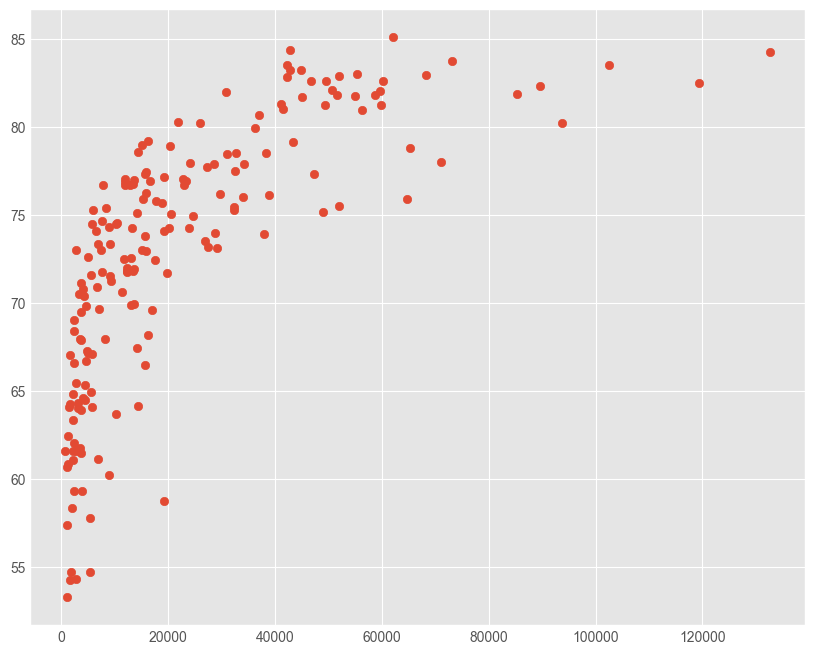

In [49]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
_ = plt.scatter(x=lex_gdp_countries_df['2019_gdp'], y=lex_gdp_countries_df['2019_lex'])

* Η εικόνα δείχνει ότι οι χώρες ανήκουν σε δύο διαφορετικές κατηγορίες:

  * Μια ομάδα με μεγάλες διαφορές στο προσδόκιμο ζωής και μικρές διαφορές στο κατά κεφαλήν ΑΕΠ, οι οποίες βρίσκονται στο αριστερό άκρο της εικόνας.
  
  * Μια ομάδα με μικρές διαφορές στο προσδόκιμο ζωής και μεγάλες διαφορές στο κατά κεφαλήν ΑΕΠ, περίπου από τα  $25.000 και πάνω.

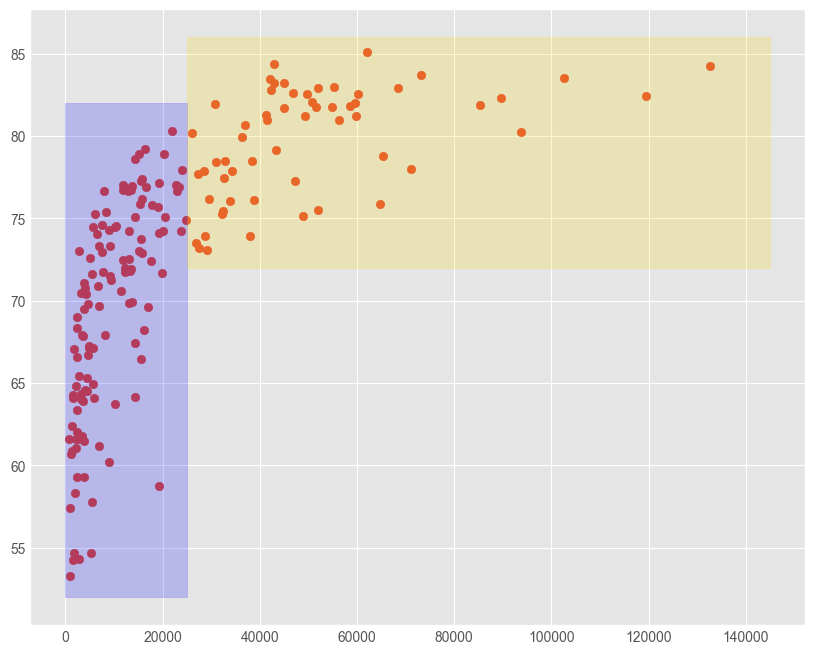

In [50]:
import matplotlib.patches as patches

plt.figure(figsize=(10, 8))
plt.scatter(x=lex_gdp_countries_df['2019_gdp'], y=lex_gdp_countries_df['2019_lex'])
rect1 = patches.Rectangle((0, 52), width=25000, height=30, color='blue', alpha=0.2)
rect2 = patches.Rectangle((25000, 72), width=120000, height=14, color='gold', alpha=0.2)
plt.gca().add_patch(rect1)
_ = plt.gca().add_patch(rect2)

* Αν ενδιαφερόμαστε στη μαθηματική σχέση μεταξύ του εισοδήματος και του προσδόκιμου ζωής, αυτή φαίνεται πιο καθαρά αν μετατρέψουμε τον άξονα $x$ ώστε η κλίμακα να είναι λογαριθμική. 

* Τότε παίρνουμε μια σχέση της μορφής:

  $$ y = a + b \log(x) $$

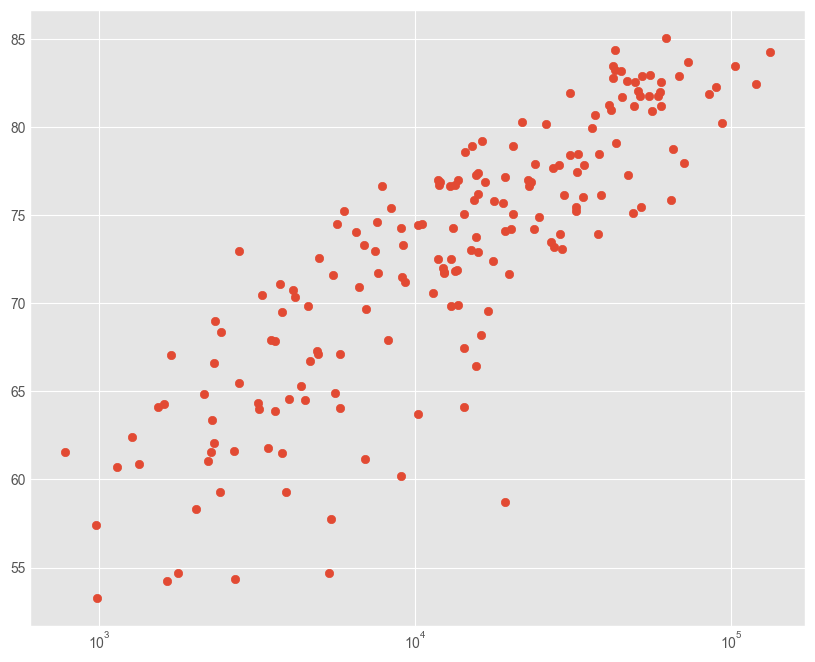

In [51]:
plt.figure(figsize=(10, 8))
plt.scatter(x=lex_gdp_countries_df['2019_gdp'], y=lex_gdp_countries_df['2019_lex'])
plt.xscale('log')

* Ας προσθέσουμε και τον πληθυσμό στην εικόνα.

* Ο πληθυσμός είναι διαθέσιμος από το <http://data.worldbank.org/indicator/SP.POP.TOTL>.

* Αφαιρούμε πάλι την τελευταία στήλη.

In [52]:
population_df = pd.read_csv('worldbank/population/API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv', 
                            skiprows=4)
population_df.drop(population_df.columns[len(population_df.columns) - 1], 
                   inplace=True, axis=1)

In [53]:
population_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and So...,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Ce...,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


* Θα ενώσουμε το `DataFrame` που έχουμε τα στοιχεία ΑΕΠ και προσδόκιμου ζωής με το `DataFrame` του πληθυσμού.

* Η ένωση θα γίνει και πάλι πάνω στη στήλη `Country Code`.

In [54]:
pop_lex_gdp_countries_df = pd.merge(lex_gdp_countries_df, 
                                    population_df, 
                                    how="inner", 
                                    on="Country Code")

In [55]:
pop_lex_gdp_countries_df

,Country Name_x,Country Code,Indicator Name_gdp,Indicator Code_gdp,1960_gdp,1961_gdp,1962_gdp,1963_gdp,1964_gdp,1965_gdp,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Afghanistan,AFG,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
2,Angola,AGO,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
3,Albania,ALB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0
4,Andorra,AND,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,83748.0,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
213,"Yemen, Rep.",YEM,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
214,South Africa,ZAF,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
215,Zambia,ZMB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


* Για λόγους τεκμηρίωσης θα μετονομάσουμε τις στήλες του πληθυσμού ώστε να έχουν την κατάληξη `_pop`.

In [56]:
pop_column_names = { c: f'{c}_pop' for c in population_df.columns if '1960' <= c <= '2020'}
pop_lex_gdp_countries_df.rename(columns=pop_column_names, inplace=True)

In [57]:
pop_lex_gdp_countries_df

,Country Name_x,Country Code,Indicator Name_gdp,Indicator Code_gdp,1960_gdp,1961_gdp,1962_gdp,1963_gdp,1964_gdp,1965_gdp,...,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop
0,Aruba,ABW,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Afghanistan,AFG,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
2,Angola,AGO,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
3,Albania,ALB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0
4,Andorra,AND,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,83748.0,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
213,"Yemen, Rep.",YEM,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
214,South Africa,ZAF,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
215,Zambia,ZMB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


* Για να δούμε τι μπορούμε να φτιάξουμε λαμβάνοντας υπόψη και τον πληθυσμό.

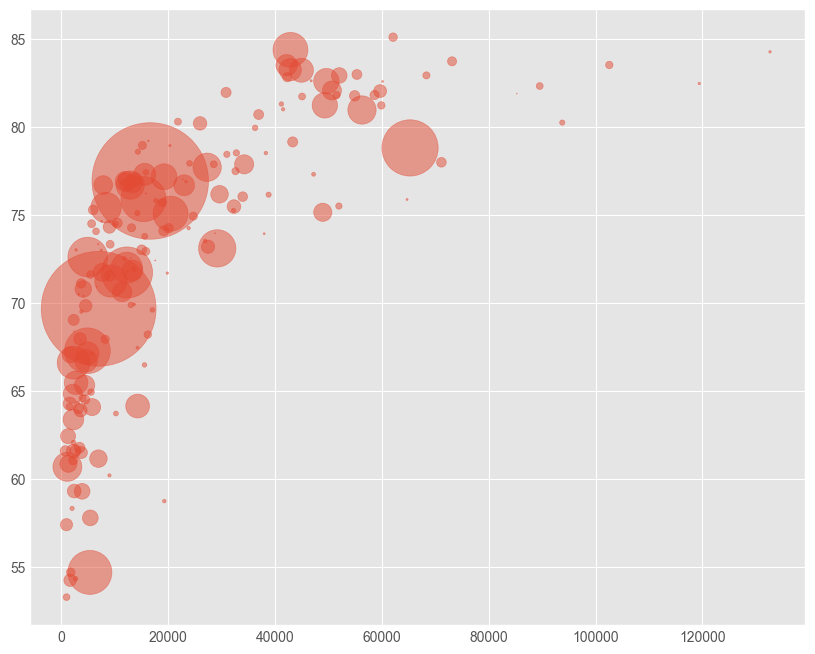

In [58]:
plt.figure(figsize=(10, 8))
_ = plt.scatter(x=pop_lex_gdp_countries_df['2019_gdp'], y=pop_lex_gdp_countries_df['2019_lex'], 
                s=pop_lex_gdp_countries_df['2019_pop']/(2*10**5),
                alpha=0.5)

* Μπορούμε να αλλάξουμε τις τιμές στον οριζόντιο άξονα ώστε να είναι σε χιλιάδες.

* Επίσης, μπορούμε να τον κάνουμε πάλι λογαριθμικό.

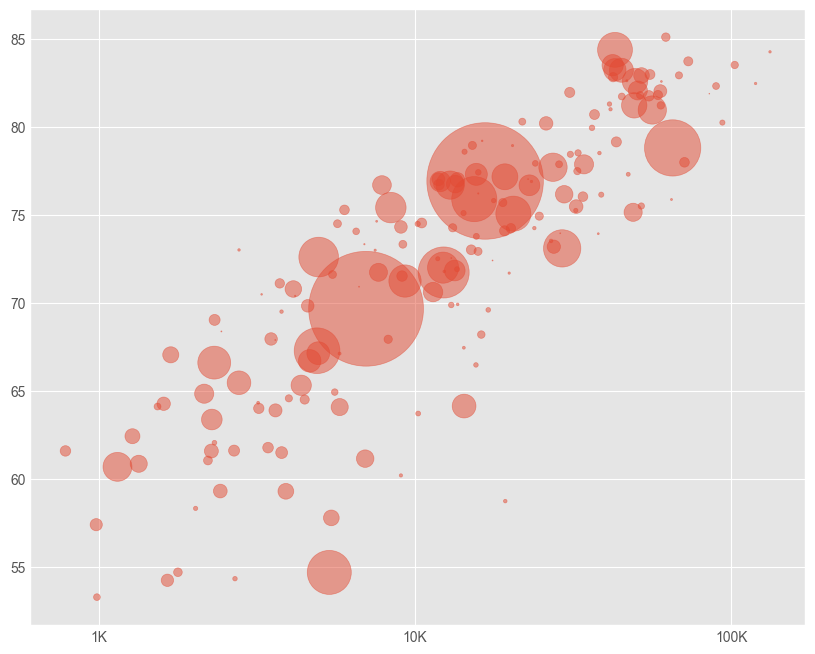

In [59]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 8))
plt.scatter(x=pop_lex_gdp_countries_df['2019_gdp'], 
            y=pop_lex_gdp_countries_df['2019_lex'], 
            s=pop_lex_gdp_countries_df['2019_pop']/(2*10**5),
            alpha=0.5)
plt.xscale("log")

formatter = FuncFormatter(lambda v, p: "%dK" % (v / 1000))

plt.gca().xaxis.set_major_formatter(formatter)

* Για να βελτιώσουμε επιπλέον το γράφημά μας, θα θέλαμε να ομαδοποιήσουμε τις χώρες αναλόγως την περιοχή που βρίσκονται.

* Για να το κάνουμε αυτό θα χειριστούμε την περιοχή ως κατηγορική μεταβλητή και θα αντιστοιχίσουμε έναν αριθμό σε κάθε κατηγορία.

In [60]:
region_cat = pop_lex_gdp_countries_df['Region'].sort_values().astype('category')
pop_lex_gdp_countries_df['Region Code'] = region_cat.cat.codes

In [61]:
pop_lex_gdp_countries_df

,Country Name_x,Country Code,Indicator Name_gdp,Indicator Code_gdp,1960_gdp,1961_gdp,1962_gdp,1963_gdp,1964_gdp,1965_gdp,...,2012_pop,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop,2020_pop,Region Code
0,Aruba,ABW,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,2
1,Afghanistan,AFG,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,5
2,Angola,AGO,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,6
3,Albania,ALB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,1
4,Andorra,AND,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,1
213,"Yemen, Rep.",YEM,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,3
214,South Africa,ZAF,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,6
215,Zambia,ZMB,"GDP per capita, PPP (...",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,6


* Έτσι, μπορούμε να φτιάξουμε ένα γράφημα που να περιέχει και τη γεωγραφική περιοχή κάθε χώρας.

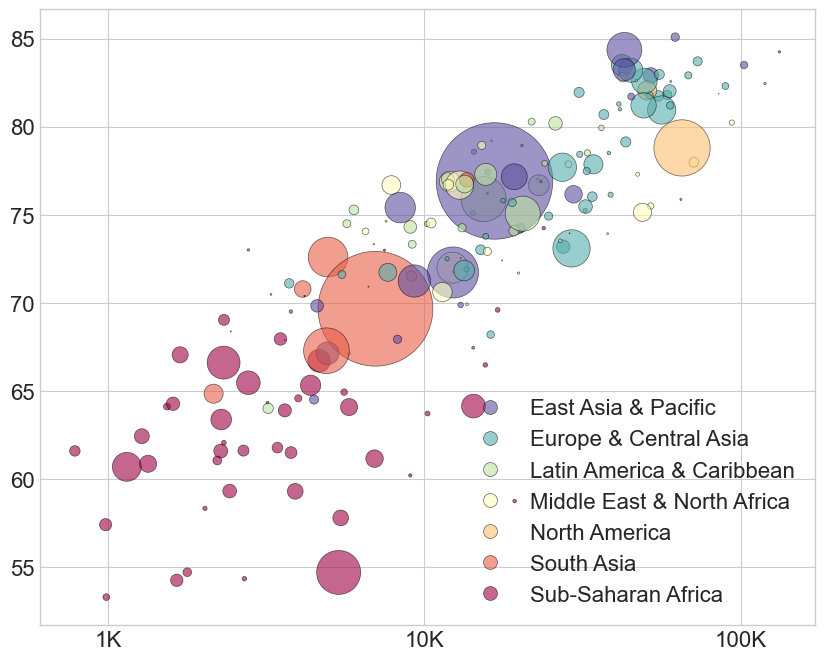

In [62]:
plt.style.use('seaborn-v0_8-whitegrid')

matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=pop_lex_gdp_countries_df['2019_gdp'], 
            y=pop_lex_gdp_countries_df['2019_lex'], 
            s=pop_lex_gdp_countries_df['2019_pop']/(2*10**5),
            c=pop_lex_gdp_countries_df['Region Code'],
            alpha=0.6,
            edgecolors='k',
            label=pop_lex_gdp_countries_df['Region'],
            cmap='Spectral_r')

handles, labels = scatter.legend_elements(prop="colors", num=len(region_cat.cat.categories), 
                                          size=10, mec='k', alpha=0.6)
labels = region_cat.cat.categories
plt.legend(handles, labels, loc="lower right")
plt.xscale("log")
formatter = FuncFormatter(lambda v, p: "%dK" % (v / 1000))
plt.gca().xaxis.set_major_formatter(formatter)

* Ή, αν δεν θέλουμε λογαριθμική κλίμακα:

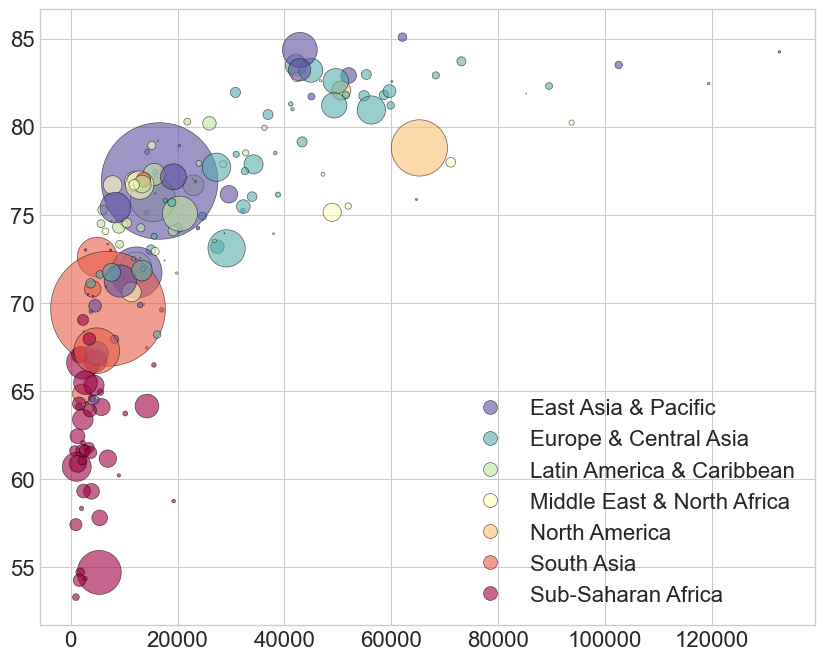

In [63]:
plt.style.use('seaborn-v0_8-whitegrid')

matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=pop_lex_gdp_countries_df['2019_gdp'], 
            y=pop_lex_gdp_countries_df['2019_lex'], 
            s=pop_lex_gdp_countries_df['2019_pop']/(2*10**5),
            c=pop_lex_gdp_countries_df['Region Code'],
            alpha=0.6,
            edgecolors='k',
            label=pop_lex_gdp_countries_df['Region'],
            cmap='Spectral_r')

handles, labels = scatter.legend_elements(prop="colors", num=len(region_cat.cat.categories), 
                                          size=10, mec='k', alpha=0.6)
labels = region_cat.cat.categories
_ = plt.legend(handles, labels, loc="lower right")

* Και ας κλείσουμε με ένα από τα καλύτερα γραφήματα που έχουν φτιαχτεί ποτέ.

* Το γράφημα κατασκευάστηκε από τον [Charles Joseph Minard](https://en.wikipedia.org/wiki/Charles_Joseph_Minard) το 1869.

* Απεικονίζει την εκστρατεία του Ναπολέοντα στη Ρωσία. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Minard.png/1024px-Minard.png">